# _Helpful Resources related to This Notebook_

- https://realpython.com/python-pathlib/
- [demoji 0.1.5](https://pypi.org/project/demoji/)
- [Using UMAP for Clustering](https://umap-learn.readthedocs.io/en/latest/clustering.html)
- [Text Modeling Visualizers](https://www.scikit-yb.org/en/latest/api/text/index.html)
- [Topic Modeling with NMF and SVD](https://github.com/fastai/course-nlp/blob/master/2-svd-nmf-topic-modeling.ipynb)
- [More detail about randomized SVD](https://github.com/fastai/course-nlp/blob/master/3b-more-details.ipynb)
- [Tutorial: Text Classification in Python Using spaCy](https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/)
- [spaCy Visualizers](https://spacy.io/usage/visualizers)
- [spaCy Linguistic Features](https://spacy.io/usage/linguistic-features)
- [Parsing a tweet to extract hashtags into an array](https://stackoverflow.com/questions/2527892/parsing-a-tweet-to-extract-hashtags-into-an-array)
- [Text Data Cleaning - tweets analysis](https://www.kaggle.com/ragnisah/text-data-cleaning-tweets-analysis)
- [Altair Exploring Weather Case Study](https://altair-viz.github.io/case_studies/exploring-weather.html)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import os

In [3]:
os.getcwd()

'/notebooks/IRA-Twitter-Disinformation'

In [4]:
from pathlib import Path

path = Path(os.getcwd())

In [5]:
path.cwd()

PosixPath('/notebooks/IRA-Twitter-Disinformation')

In [6]:
def tree(directory):
    print(f'+ {directory}')
    for path in sorted(directory.rglob('*')):
        depth = len(path.relative_to(directory).parts)
        spacer = '    ' * depth
        print(f'{spacer}+ {path.name}')

In [7]:
tree(path.cwd())

+ /notebooks/IRA-Twitter-Disinformation
    + .ipynb_checkpoints
        + exp2_feb16-checkpoint.ipynb
        + exp_altair-checkpoint.ipynb
    + chart.html
    + data
        + .ipynb_checkpoints
        + everything_2020_02_07.pkl
    + exp2_feb16.ipynb
    + exp_altair.ipynb
    + exp_nbs
        + .ipynb_checkpoints
            + exp2_jan27-checkpoint.ipynb
            + exp_jan27-checkpoint.ipynb
        + exp2_jan27.ipynb
        + exp_jan27.ipynb


In [8]:
data_path = (path.cwd() / "data")

In [9]:
#!pip install --upgrade pandas

In [10]:
import pandas as pd

df = pd.read_pickle(path/"data/everything_2020_02_07.pkl")

In [11]:
df.head()

,CREATED_AT,USERNAME,TWEET,LABEL
0,2008-12-19 14:47:13+00:00,50cent,is in Turkey,verified
1,2008-12-24 00:35:55+00:00,50cent,Yayo's cover is crazy! http://i40.tinypic.com...,verified
2,2008-12-25 16:21:47+00:00,50cent,check me out on Ciara - Slow Down Rmx : http:...,verified
3,2009-01-05 13:41:53+00:00,50cent,"My 2nd single out Monday ""I Get It In"" Prod by...",verified
4,2009-01-06 09:55:11+00:00,50cent,"New joint!! ""i get it in"" prod by dr dre! list...",verified


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985035 entries, 0 to 1985034
Data columns (total 4 columns):
 #   Column      Dtype              
---  ------      -----              
 0   CREATED_AT  datetime64[ns, UTC]
 1   USERNAME    object             
 2   TWEET       object             
 3   LABEL       object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 60.6+ MB


In [13]:
# convert USERNAME to categorical type
df["USERNAME"] = df["USERNAME"].astype("category")

In [14]:
# convert LABEL column to categorical type
df["LABEL"] = df["LABEL"].astype("category")

In [15]:
# take a sample to work with
sample = df.sample(n=1000, random_state=5).sort_values("CREATED_AT", ascending=False).reset_index(drop=True)

## _Experimentation: Altair_

In [16]:
sample

,CREATED_AT,USERNAME,TWEET,LABEL
0,2020-01-25 23:54:43+00:00,nasa,This pup nose how to get our attention.🤩,verified
1,2019-12-27 23:59:02+00:00,cnn,Authorities are responding to an explosion at ...,verified
2,2019-12-17 23:20:04+00:00,cnn,Former Republican presidential candidate Carly...,verified
3,2019-12-16 16:08:49+00:00,twitter,"If this is a game, you won",verified
4,2019-12-07 11:10:04+00:00,cnn,"Ron Leibman, an acclaimed film, television and...",verified
...,...,...,...,...
995,2007-11-23 03:06:23+00:00,nytimes,Somali President Reveals Choice for Prime Mini...,verified
996,2007-11-20 04:05:50+00:00,nytimes,Favorite Audio Book? http://tinyurl.com/2e8qjw,verified
997,2007-10-25 23:05:39+00:00,nytimes,New American Sanctions Levied Against Iran ht...,verified
998,2007-09-14 16:22:39+00:00,nytimes,British Bank Offered Emergency Loan http://ti...,verified


## _Pre-processing text data_

In [17]:
import string
import re
import demoji
demoji.download_codes()

punctuation = string.punctuation + "—"

... OK (Got response in 0.14 seconds)
Writing emoji data to /root/.demoji/codes.json ...
... OK


In [18]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [19]:
#!pip install demoji

In [66]:
def clean_tweet(text):
    # remove punctuation
    text = "".join([char for char in text if char not in punctuation])
    # remove numbers
    text = re.sub("[0-9]+", "", text)
    #remove links
    text = re.sub(r"http\S+", "", text)
    # remove emjois
    text = demoji.replace(text, "")
    return text

In [67]:
sample["preprocess"] = sample["TWEET"].progress_apply(lambda x: clean_tweet(x))

In [68]:
tweet = sample["preprocess"][0]
tweet

'This pup nose how to get our attention'

In [69]:
demoji.findall(tweet)

{}

In [70]:
demoji.replace(tweet, "")

'This pup nose how to get our attention'

In [71]:
import spacy

nlp = spacy.load("en_core_web_md")

In [72]:
doc = nlp(sample["preprocess"][2:3].iloc[0])

In [73]:
from pprint import pprint

for token in doc:
    print(token.text, token.lemma_, token.pos_)

Former former ADJ
Republican republican ADJ
presidential presidential ADJ
candidate candidate NOUN
Carly Carly PROPN
Fiorina Fiorina PROPN
says say VERB
she -PRON- PRON
thinks think VERB
its -PRON- DET
vital vital ADJ
that that SCONJ
Trump Trump PROPN
be be AUX
impeached impeach VERB
but but CCONJ
stops stop VERB
short short ADV
of of ADP
calling call VERB
for for ADP
his -PRON- DET
removal removal NOUN
from from ADP
office office NOUN
and and CCONJ
does do AUX
nt not PART
rule rule VERB
out out ADP
voting vote VERB
for for ADP
him -PRON- PRON
again again ADV
BossFiles BossFiles PROPN
Read Read VERB
        SPACE
Listen listen VERB
     SPACE


In [74]:
#spacy.displacy.serve(doc, style="dep")

In [75]:
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

parser = English()

In [76]:
def spacy_tokenizer(text):
    # creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(text)
    # lemmatize each token and convert into lowercase
    mytokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens]
    # removing stop words
    mytokens = [word for word in mytokens if word not in STOP_WORDS and word not in string.punctuation]
    return mytokens

In [77]:
# create column with tokens
sample["spacy_tokens"] = sample["preprocess"].progress_apply(lambda x: spacy_tokenizer(x))

In [78]:
sample["string_tokens"] = sample["preprocess"].progress_apply(lambda x: " ".join(spacy_tokenizer(x)))

In [79]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer()

In [80]:
# create a vector from the tokenized tweet column
vectors = vectorizer.fit_transform(sample["string_tokens"]).todense()
vectors.shape

(1000, 4835)

In [81]:
print(len(sample["string_tokens"]), vectors.shape)

1000 (1000, 4835)


In [82]:
import numpy as np

vocab = np.array(vectorizer.get_feature_names())

In [83]:
vocab.shape

(4835,)

In [84]:
vocab[3000:3020]

array(['performer', 'performing', 'perpetrators', 'persian', 'person',
       'persona', 'personal', 'personality', 'personnel', 'peru', 'pete',
       'peter', 'petition', 'pharoah', 'phase', 'phenomenal', 'phil',
       'philadelphia', 'philly', 'phoenixnewsaz'], dtype='<U63')

## _Singular Value decomposition (SVD)_

In [85]:
%time

# lemantic semantic analysis uses SVD
U, s, Vh = np.linalg.svd(vectors, full_matrices=False)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs


In [86]:
print(U.shape, s.shape, Vh.shape)

(1000, 1000) (1000,) (1000, 4835)


In [87]:
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

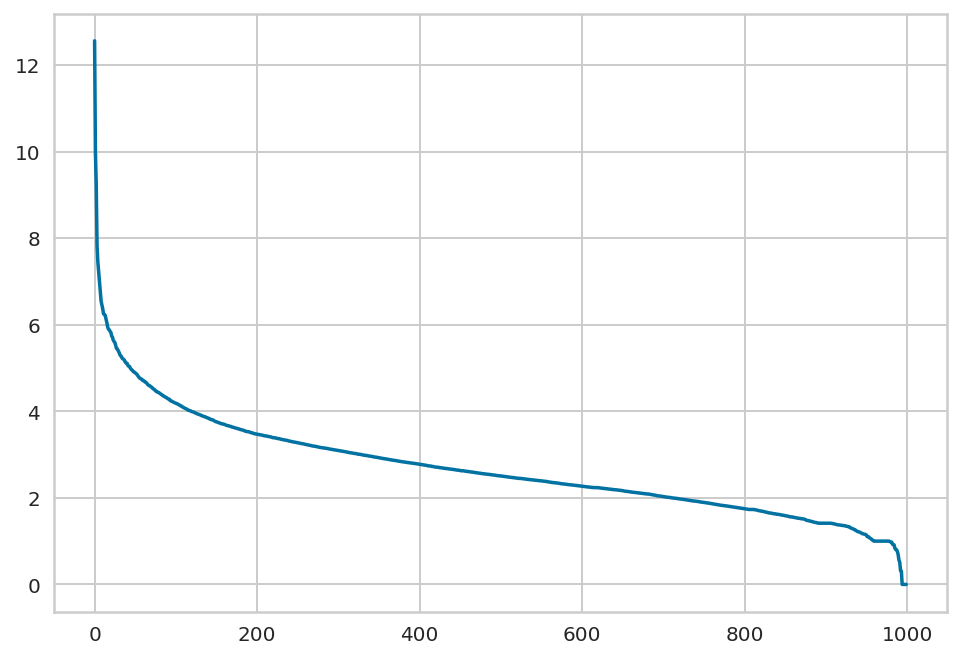

In [88]:
plt.plot(s);

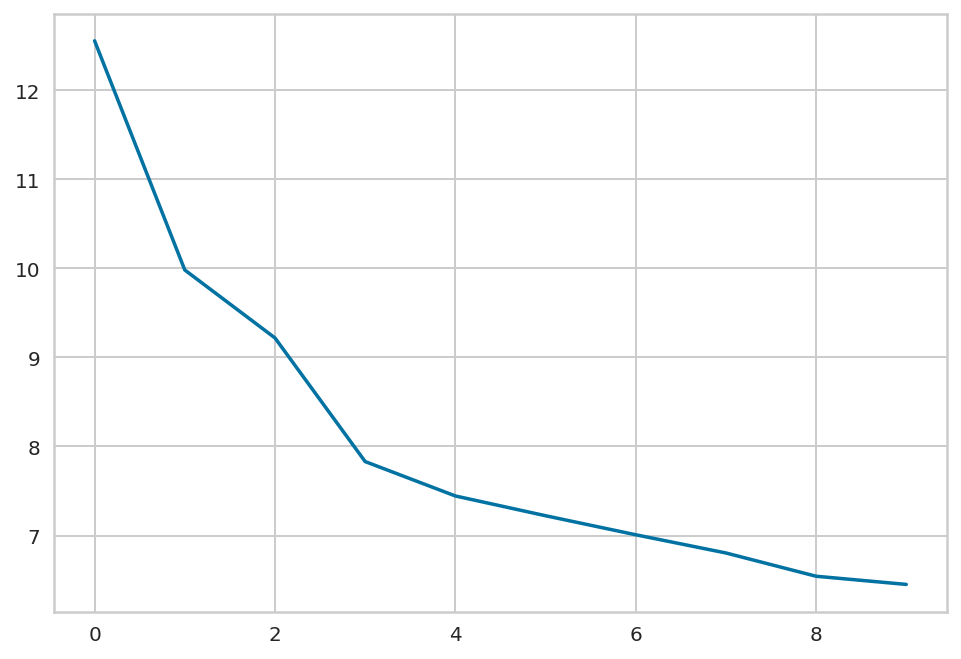

In [89]:
plt.plot(s[:10]);

In [90]:
def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [91]:
#show_topics(Vh[:10])

## _t-SNE Corpus Visualization_

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [93]:
from yellowbrick.text import TSNEVisualizer

In [94]:
tfidf = TfidfVectorizer()

In [95]:
X = tfidf.fit_transform(sample["string_tokens"])

In [96]:
y = sample["LABEL"]

In [97]:
tsne = TSNEVisualizer(labels=sample["LABEL"].unique())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


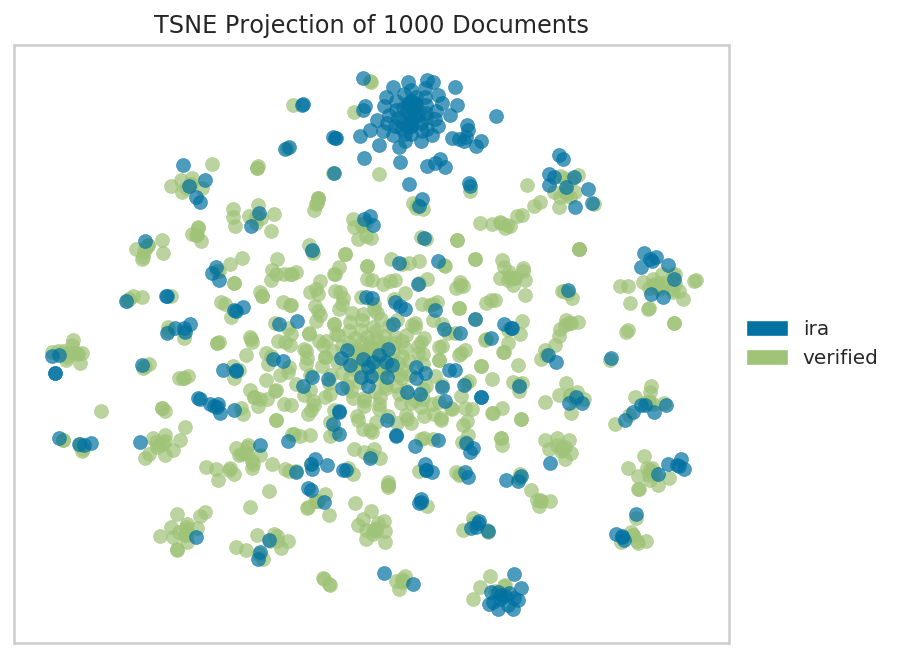

In [98]:
tsne.fit(X, y)
tsne.show()

## _UMAP Corpus Visualization_

- [Using UMAP for Clustering](https://umap-learn.readthedocs.io/en/latest/clustering.html#using-umap-for-clustering)
-                               

In [99]:
#!pip install umap-learn

In [100]:
from yellowbrick.text import UMAPVisualizer

In [101]:
umap = UMAPVisualizer()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


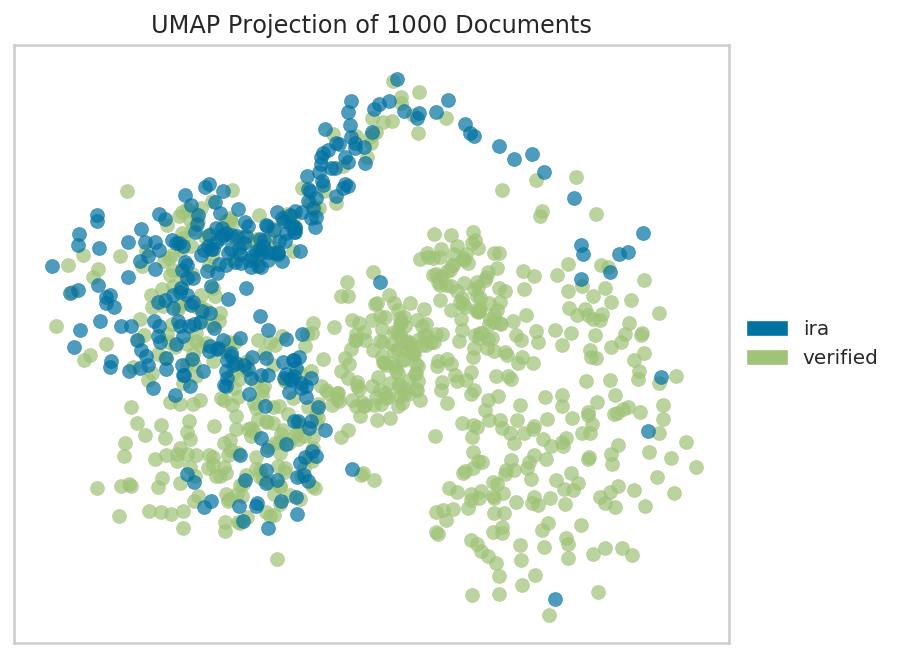

In [102]:
umap.fit(X, y)
umap.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


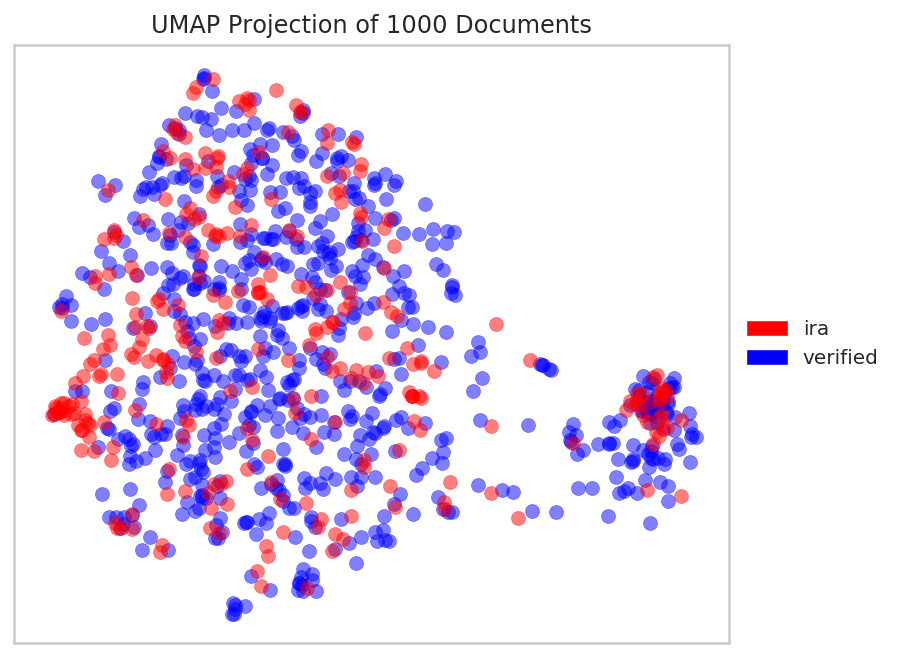

In [103]:
umap = UMAPVisualizer(metric='cosine', random_state=5, colormap="bwr_r", alpha=0.5)
umap.fit(X, y)
umap.show()

In [67]:
#!pip install hdbscan

In [69]:
import umap
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [71]:
#std_embedding = umap.UMAP(random_state=5).fit_transform(sample["string_tokens"])